In [9]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Bidirectional, GlobalAveragePooling1D
from GetXY import x_train, y_train, x_val, y_val, early_stopping


In [2]:
#Encoder:
encoder_inputs = Input(shape = (len(x_train[0]), 1))
encoder_outputs = Bidirectional(LSTM(64, return_sequences=True))(encoder_inputs)

#self-attention mechanism
attention_outputs = Attention()([encoder_outputs, encoder_outputs])

#this is not a layer, but whatever.
context_vector = GlobalAveragePooling1D()(attention_outputs)

#I guess a Decoder
output = Dense(1, activation = "linear")(context_vector)

model = Model(inputs = encoder_inputs, outputs = output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 15, 1)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional (Bidirectional) │ (None, 15, 128)           │          33,792 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention (Attention)         │ (None, 15, 128)           │               0 │ bidirectional[0][0],       │
│                               │                           │                 │ bidirectional[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d      │ (None, 128)               │               0 │ attention[0][0]            │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 1)                 │             129 │ global_average_pooling1d[… │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 33,921 (132.50 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer = "adam", loss = "mse", metrics=['mse'])

In [4]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(32)

In [5]:
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs=200,
    verbose=1, # Suppress output
    callbacks=[early_stopping]
    )

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 24.5476 - mse: 24.5476 - val_loss: 19.4757 - val_mse: 19.4757
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.7829 - mse: 19.7829 - val_loss: 18.6100 - val_mse: 18.6100
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.3817 - mse: 19.3817 - val_loss: 18.3544 - val_mse: 18.3544
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2959 - mse: 19.2959 - val_loss: 18.2577 - val_mse: 18.2577
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3155 - mse: 19.3155 - val_loss: 18.1017 - val_mse: 18.1017
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.2428 - mse: 19.2428 - val_loss: 18.2284 - val_mse: 18.2284
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.1220 - mse: 19.1220 - val_loss: 18.1212 - val_mse: 18.1212
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.0139 - mse: 19.0139 - val_loss: 19.3199 - val_mse: 19.3199
Epoch 9/200
60/60 ━━━━━━━━━━━━━

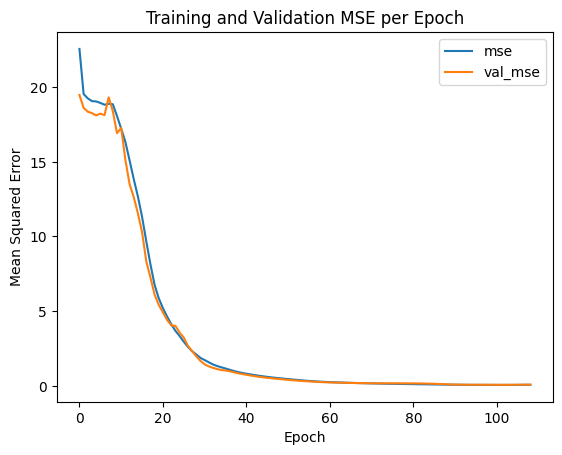

In [10]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['mse', 'val_mse']].plot()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation MSE per Epoch")
plt.show()